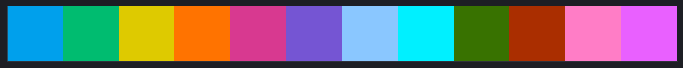

In [1]:
#constellate: setup

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp
import plotly.express as px
from scipy import stats

IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)
sns.palplot(cs)

# Gender in AI Language Models—What's In a Name?

Recent large language models such as [ChatGPT](https://chat.openai.com/chat) have made remarkable strides in understanding languages like English. For example, here's a ChatGPT response to the prompt "Write the intro to a noir story about a detective named Sam Striker":

> The neon lights of the city cast a harsh glow on the streets below, illuminating the seedy underbelly of the metropolis. Detective Sam Striker trudged through the rain-slicked streets, the weight of the world bearing down on his shoulders.
> 
> A lifetime of hard living and even harder cases had left their mark on the grizzled detective. His once-handsome face was now etched with lines of weariness and his piercing blue eyes seemed to have lost some of their spark.
> 
> But despite the toll his job had taken on him, Sam was still one of the best in the business. He had a reputation for being able to solve even the most complex and twisted cases, no matter how dark or dangerous they might be.
> 
> Tonight was no different. As he made his way through the rain-drenched streets, he was on the hunt for a killer, a shadowy figure who had left a trail of bodies in their wake.
> 
> Sam knew that this case could make or break him, and he was determined to see it through to the end, no matter what the cost. He had always been a man of determination, and tonight was no different.
>  
> With a sigh, he pulled his coat tighter around him and set his jaw, ready to take on whatever the night might bring.

Many other people have discussed how impressive these responses can be. I want to focus on an aspect of these language models (LMs) that doesn't get nearly enough attention outside of academia:

Why is Sam Striker a he?

## How Language Models (Generally) Work

Before we can understand why ChatGPT decided to make Sam Striker a he, we need to first go over how these models are trained in the first place.[^1]

Let's say you want to train a model to understand English. You start with an enormous quantity of English text. Luckily for you, that's easy to find on the Internet: you might start with all of English Wikipedia and whatever digitized books you can find. If you want even more data, as the authors of ChatGPT did, you can crawl the Web and shovel in as many different websites as you can find while trying to filter out anything you don't want your model to train on. 

Then, to teach your model how English is structured in that training data, you train it to fill in the next word in a passage. For example, here's a sentence from the [featured article on Wikipedia the day I write this](https://www.wikiwand.com/en/Like_I%27m_Gonna_Lose_You):

> After independently releasing three albums herself between 2009 and 2010, Meghan Trainor started writing songs for other singers.

Let's take a random word[^3] from this sentence and *mask* it:

> After independently releasing three <span class="text-blue">[MASK]</span> herself between 2009 and 2010, Meghan Trainor started writing songs for other singers.

Now, our model tries to guess what the missing word is. Doing this over and over again, seeing billions and billions of words, it becomes possible to piece together a very detailed understanding of how English works. The cherry on top is that, because the model is learning from real English, it's slowly learning about the world too. There's no grammar rule that will tell you what the masked token is: the most helpful information is that Meghan Trainor is a singer-songwriter. 

[^1]: This is the most common approach: there are others, but we won't have use for them right now.

[^2]: 1. Bender, E. M., Gebru, T., McMillan-Major, A. & Shmitchell, S. *On the Dangers of Stochastic Parrots: Can Language Models Be Too Big?* 🦜. in *Proceedings of the 2021 ACM Conference on Fairness, Accountability, and Transparency* 610–623 (Association for Computing Machinery, 2021). doi:10.1145/3442188.3445922.

[^3]: In truth, LMs use *tokens*, not words: for our purposes, there's no difference, but not all words are given their own dedicated code. *Monopoly* may be represented internally as *mon-o-poly*. Different LMs use different approaches.

Let's try another example[^1]: 

> Butler is best known for their books Gender Trouble: Feminism and the Subversion of Identity (1990) and Bodies That Matter: On the Discursive Limits of Sex (1993), in which they <span class='text-blue'>[MASK]</span> conventional notions of gender and develop their theory of gender performativity.

What do you think the missing word is? What possibilities are there besides whatever you think is the most likely completion?

[^1]: Source: [Wikipedia](https://www.wikiwand.com/en/Judith_butler).

Compare your work against the machine. Because the underlying model that powers ChatGPT is unfortunately not public, I'm using a model that is, called RoBERTa. It's what I'll be using for my analysis, although almost everything here should translate to any model trained the same way.

As it turns out, <span class='text-blue'>challenge</span> is the correct answer here. The sentence reads

> Butler is best known for their books Gender Trouble: Feminism and the Subversion of Identity (1990) and Bodies That Matter: On the Discursive Limits of Sex (1993), in which they <span class='text-blue'>challenge</span> conventional notions of gender and develop their theory of gender performativity.

Our model thinks that completion is about 43% likely. I've shown the nine runners-up—all of them are reasonable completions. Every other word in the English language combined accounts for the missing 10%.

Text(0.5, 1.0, 'Predicted Word')

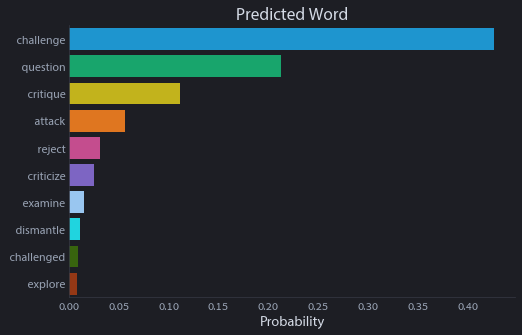

In [2]:
# how this was generated: loading the LM is too much to do every time this plot generates, however

# import pandas as pd
# import torch
# from transformers import RobertaForMaskedLM, RobertaTokenizer

# tokenizer = RobertaTokenizer.from_pretrained("roberta-large")
# model = RobertaForMaskedLM.from_pretrained("roberta-large")

# inputs = tokenizer(''.join(['Butler is best known for their books Gender Trouble: Feminism',
# ' and the Subversion of Identity (1990) and Bodies That Matter: On the Discursive Limits',
# ' of Sex (1993), in which they <mask> conventional notions of gender and develop their',
# ' theory of gender performativity.']), return_tensors="pt")
# with torch.no_grad():
#     logits = model(**inputs).logits

# mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]
# top_10 = logits[0, mask_token_index].argsort(axis=-1, descending=True)[:, :10]
# probs = torch.softmax(logits, dim=-1)

# for i in top_10[0]:    
#     print(f'{tokenizer.decode(i):>15}', f'{probs[[0, mask_token_index, i]].item():>7.2%}')

# tokens = pd.DataFrame({'Word': [tokenizer.decode(i) for i in top_10[0]],
#  'Probability': probs[0, mask_token_index, top_10].numpy()[0]})
# tokens.to_dict()


tokens = pd.DataFrame({'Word': {0: ' challenge',
  1: ' question',
  2: ' critique',
  3: ' attack',
  4: ' reject',
  5: ' criticize',
  6: ' examine',
  7: ' dismantle',
  8: ' challenged',
  9: ' explore'},
 'Probability': {0: 0.4263342022895813,
  1: 0.21269142627716064,
  2: 0.11151457577943802,
  3: 0.05667518451809883,
  4: 0.031241867691278458,
  5: 0.025425635278224945,
  6: 0.01492752879858017,
  7: 0.011197446845471859,
  8: 0.008910472504794598,
  9: 0.00812084972858429}})

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=tokens, orient='h', x='Probability', y='Word')
ax.set_ylabel('')
ax.set_title('Predicted Word')

This fill-in-the-blank task feels a long way away from the response you saw ChatGPT give earlier, but it really isn't. When you give ChatGPT a prompt, it's simply trying to guess what the most natural follow-up would be, one word at a time. There's a lot of work around the edges to make sure that ChatGPT is nice to people, doesn't try to give answers it doesn't know, and doesn't repeat itself or ramble. At its core, however, all it's doing is filling in the blank. 

## The Blessing and the Curse of Large Language Models

Language models are amazing. It's astonishing how natural conversations with GPT-3, the language model underpinning ChatGPT, can feel despite the fact that all it can do is fill in the blank.

Nonetheless, the serious limitations of any approach like this one become apparent if you know where you look:

 - GPT-3 will fill in whatever it thinks is most likely, not what would actually be the best thing to respond. If it thinks a tirade filled with racial slurs is the best completion, that's what it'll give you.
 - In a similar vein, GPT-3 will very convincingly lie to you: it has no inherent idea of what it knows or should guess. Much of the work that went into ChatGPT as opposed to the base GPT-3 model involved trying to fix this, but it's a tricky problem to solve. It's hard to distinguish being unsure of what the next word should be with being unsure of what answer to give. 
 - Sometimes it just can't figure out how to fill in a blank effectively. One example is arithmetic: it's pretty good with small numbers, but if you ask it to compute 1382 times 2349 it'll give you an answer that's close but not quite right—for example, 3,219,418 when the answer is 3,246,318. Note how it's almost right: clearly the network is picking up something here, but it doesn't know how to do the schoolbook multiplication algorithm because that's really hard to learn from raw English text.

In sum: if you try [ChatGPT](https://chat.openai.com/) on your own, you'll probably find that it knows English very well. It makes fewer grammatical errors than I do, and it excels at emulating specific styles of writing as you saw with the noir example earlier. Its responses, at times, sound remarkably human.

Unfortunately, you might also find that it's picked up some of our human foibles, and that because it's trained on what we write it learned some of our biases along with our language. If I had to bet on the pronouns of a noir detective named Sam Striker, "he" would be a good guess. On the other hand, if I were emailing a Sam Striker, I'd make sure they weren't Samantha Striker before calling them that. My sense of respect and courtesy isn't programmed into GPT-3 or RoBERTa.

Because these models have been trained on what we as a people have written, it provides a fascinating glimpse into our biases and follies. Research on these models tends to focus, reasonably, on fixing these biases and preventing them from showing up in the outputs. That's important work, and we owe it to ourselves to make sure that AI doesn't thoughtlessly perpetuate our own mistakes.

While these biases remain, however, there's a lot of interesting things to learn about language. Let's look at how language models conceptualize the words we attach perhaps more significance to than any other—our names.

## Quantifying Gendered Names Using AI

Names are all over the Internet, and as such language models have picked up on them. Consider the following masked sentence[^1]:

> In December 2020, Timnit Gebru was the center of a public controversy stemming from <span class='text-blue'>[MASK]</span> abrupt and contentious departure from Google as technical co-lead of the Ethical Artificial Intelligence Team.

The missing word is <span class='text-blue'>her</span>, because Timnit Gebru uses she/her/hers pronouns. For those of us unfamiliar with Eritrean names, correctly discerning the prounoun is difficult. RoBERTa also finds this difficult—the model assigns a 77% chance of <span class='text-red'>his</span> as the completion and only a 22% chance of <span class='text-blue'>her</span>. (Language models train on publicly available English, meaning that they're also far less familiar with Eritrean names than common American ones.)

Here lies the interesting challenge: when trying to ascertain the completion here, we might consciously avoid gendered stereotyping, even if we would unconsciously associate certain professions or actions with men and women. We know that, logically, the only clue we *ought* to use here is Timnit Gebru's name. 

RoBERTa has no such qualms. Consider the predictions for a sentence that changes out the job:

> In December 2020, Timnit Gebru was the center of a public controversy stemming from <span class='text-blue'>[MASK]</span> abrupt and contentious departure from Google as an administrative assistant.

Now RoBERTa assigns a 62% chance of <span class='text-blue'>her</span> and a 36% chance of <span class='text-red'>his</span>. This kind of stereotyping doesn't overpower strongly gendered names: changing Timnit Gebru to Emily Bender in the above examples leads to <span class='text-blue'>her</span> being given over a 99% probability even in the male-stereotyped job of AI research.

If we want to see what RoBERTa thinks of names like Timnit, however, we need to find a way of prompting it that avoids any overt biases. (We can look at those another day.)

[^1]: Source: [Wikipedia](https://www.wikiwand.com/en/Timnit_Gebru), modified to include Gebru's first name (not that it changes the results substantially.)

A good prompt to quantify name-gender association needs two qualities:

 - The prompt has to strongly suggest a single pair of gendered pronouns. A sentence like "<span class='text-blue'>[MASK]</span> name is Emily" will prompt mostly "my" as a prediction, which makes our results less stable.
 - The prompt should not overtly bias the results one way or another. Every prompt will give slightly different results, so the difference between 61% and 63% will never be very meaningful. But a sentence like "Morgan loved <span class='text-blue'>[MASK]</span> job as a nurse" will result in "Morgan" being associated with female pronouns more than it would otherwise.

After a lot of testing, the prompt I settled on was 

> I heard <span class='text-blue'>[MASK]</span> name was Morgan.

The "I heard" at the start ensures that "my" and "your" are less likely than they would otherwise be. Completion for "I heard <span class='text-blue'>[MASK]</span> name" is biased towards "his", but that's true of almost any neutral prompt and reflects underlying biases in the model.

To compute the gender split of a name, I insert a name into the spot where Morgan is in the above prompt. I then prompt RoBERTa to fill in the blank, take the answers for "her" and "his", and see what proportion of that probability is assigned to "her". 

### Experimental Setup Validation

Let's verify that this approach offers meaningful information. To do that, we can compare with a more objective source: the Social Security Administration's database of names given to children in the United States. I've selected the 3,630 names with at least one year with over 300 babies, which leaves a list of 3,630 names. I then ran the above RoBERTa setup with each: testing "I heard <span class='text-blue'>[MASK]</span> name was Aaden", then "Aaliyah", and so on.

As a way of verifying the setup, we can compare the probability RoBERTa assigns to the actual historical ratio. The correlation between the two is 90%, indicating that RoBERTa's probabilities really do correspond to some underlying intuition about the gender split of different names.[^1]

[^1]: This is the main way I ranked different prompts and language models, incidentally. 

In [3]:
#constellate: setup
names = pd.read_feather('names.feather')
names.drop(columns=['year', 'gs_f2', 'lm_ratio', 'log_count'], inplace=True)

names.eval('''
gs_f = gs_f * 100
ratio = ratio * 100
last_year_ratio = last_year_ratio * 100
''', inplace=True)
names.rename(columns={
    'name': 'Name',
    'F': 'Girls',
    'M': 'Boys',
    'count': 'Total Babies',
    'ratio': 'Percent Girls',
    'last_year_ratio': 'Percent Girls 2021',
    'gs_f': 'RoBERTa Percent Female'
}, inplace=True)

years = pd.read_feather('years.feather')
years.eval('''
pct_female = F / (F + M) * 100
pct_female_reg = (F + 200) / (F + M + 400) * 100
''', inplace=True)
total_babies = years.groupby('year').sum()['count']

In [4]:
#constellate: setup
# There's a really interesting problem in dealing with ratios. Let's say you want to find the names that change genders over time.
# Including every year will lead to one person in 1890 changing the ratio in that year to 0 or 1, leading to nonsensical results.
# Excluding years below some count threshold works, but is arbitrary. Regularizing towards 50% isn't hard: (F + 100) / (F + M + 200)
# adds a fake 100 babies to F and M, evening out those splits.
# Even better, which requires a bit more work, is to bias towards the group mean instead of 50%. The reason this is important comes from
# the changes that happen purely from regularization: even if a name is entirely one gender, the percentage shifts from regularization alone.

all_time_ratio = names.set_index('Name').loc[years['name'], 'Percent Girls'].reset_index(drop=True) / 100

# How many fake babies to add to each year
REG_AMOUNT = 200
years['pct_female_reg'] = (years['F'] + REG_AMOUNT * all_time_ratio) / (years.eval('F + M') + REG_AMOUNT)
years

,name,year,F,M,count,pct_female,pct_female_reg
0,Aaden,2001,0,7,7,0.000000,0.000963
1,Aaden,2002,0,13,13,0.000000,0.000936
2,Aaden,2003,0,20,20,0.000000,0.000906
3,Aaden,2004,0,21,21,0.000000,0.000902
4,Aaden,2005,0,33,33,0.000000,0.000855
...,...,...,...,...,...,...,...
336487,Zyaire,2017,31,301,332,9.337349,0.102561
336488,Zyaire,2018,35,323,358,9.776536,0.104951
336489,Zyaire,2019,27,540,567,4.761905,0.065923
336490,Zyaire,2020,28,667,695,4.028777,0.057612


In [5]:
#constellate: dataframe

names.round(2).head(100)

,Name,Girls,Boys,Total Babies,Percent Girls,Percent Girls 2021,RoBERTa Percent Female
0,Aaden,5,5013,5018,0.10,0.00,5.14
1,Aaliyah,98342,101,98443,99.90,100.00,97.40
2,Aarav,0,6613,6613,0.00,0.00,5.87
3,Aaron,4353,596930,601283,0.72,0.33,2.13
4,Abagail,5798,0,5798,100.00,100.00,97.31
...,...,...,...,...,...,...,...
95,Aleena,10766,0,10766,100.00,100.00,96.96
96,Aleigha,4600,0,4600,100.00,100.00,96.90
97,Alejandra,51898,530,52428,98.99,100.00,95.51
98,Alejandro,846,138949,139795,0.61,0.00,2.21


Here's what it looks like when you graph the predicted ratios against the actual ratio. The names for which the AI prediction and actual historical data differ are found in the top left and bottom right. The majority of predictions are straightforwardly correct, like <span class='text-c2'>Jill</span> or <span class='text-c3'>Mohamed</span>: names we might assume go with a specific set of pronouns. 

Some names are a bit more interesting, and it's instructive to see where the model messes up:
 - Just like us, the model is strongly influenced by famous people, fictional or not. Most people named <span class='text-c4'>Rey</span> in the US are boys, but if you're talking about Rey on the Internet there's a good chance you're talking about the heroine of the third *Star Wars* trilogy.
 - The model doesn't distinguish between names and other words. That's my theory as to why a name like <span class='text-c5'>Robin</span> that is mostly for girls gets misclassified by the model. Similarly, <span class='text-c6'>Isis</span> has rather unfortunate modern connotations with the terrorist group that overshadow its use as a girls name. [There's some evidence](https://www.wikiwand.com/en/Nominative_determinism) that the meaning of names can influence our own behavior just like it seems to here—we have a strong subliminal positive association with our own names which may influence us to, for example, pick careers that match our name.
 - It's important to remember that the Social Security Administration tracks what gets put on birth certificates. <span class='text-c7'>Sasha</span> is a common nickname for Alexander, which explains why the model associates it with men. But the SSA doesn't track what people go by in their daily lives, and if Sasha is on your birth certificate you were probably born a girl.



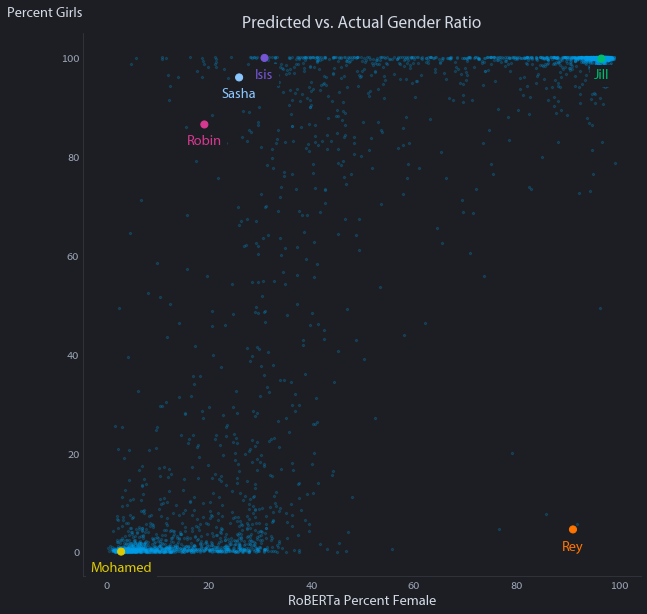

In [6]:
marked_names = ['Jill', 'Mohamed', 'Rey', 'Robin', 'Isis', 'Sasha']

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    data=names.query('Name not in @marked_names'),
    x='RoBERTa Percent Female',
    y='Percent Girls',        
    color=cs[0],
    s=5,
    alpha=0.2
)

marked = names.set_index('Name').loc[marked_names]

ax.scatter(
    data=marked,
    x='RoBERTa Percent Female',
    y='Percent Girls',        
    color=cs[1:len(marked_names) + 1],
    s=50
)

for c, (name, row) in zip(cs[1:], marked.iterrows()):
    ax.annotate(name, (row['RoBERTa Percent Female'], row['Percent Girls']), xytext=(0, -20), textcoords='offset points',
    color=c, size='large', ha='center', backgroundcolor=plt.rcParams['axes.facecolor'])

ax.set_title('Predicted vs. Actual Gender Ratio')
ax.set_xlabel('RoBERTa Percent Female')
ax.set_ylabel('Percent Girls')
rp.ylabel_top(ax)

## Naming Shifts Over Time

It's well-known that names often exhibit generational shifts in popularity. If you're an American named Linda, there's over a 50% chance you were born between 1946 and 1955.

Similarly, some names exhibit shifts in their gender associations. 85% of all Charlies are male, but 53% of the Charlies born in 2021 were girls.

Here I've graphed the names with the biggest shifts over time.[^1] Some observations:

 - Names tend to shift from boys to unisex or boys to girls, not the other way round. I attribute this to fragile masculinity: parents seem to think that naming their son Sophia will cause more problems than naming their daughter Stevie. Note how Jaime and Ashton start as a boys name, become unisex, and then snap back. I attribute Ashton's drop to Ashton Kutcher, born in 1978. Not sure about Jaime.
 - These shifts tended to occur around 1980: perhaps this says something about liberalizing gender norms in the 60s, perhaps it's some other pattern I've missed.

[^1]: Regularized so that years with very low counts don't bias the results, filtered to years with over 50 babies, and smoothed.

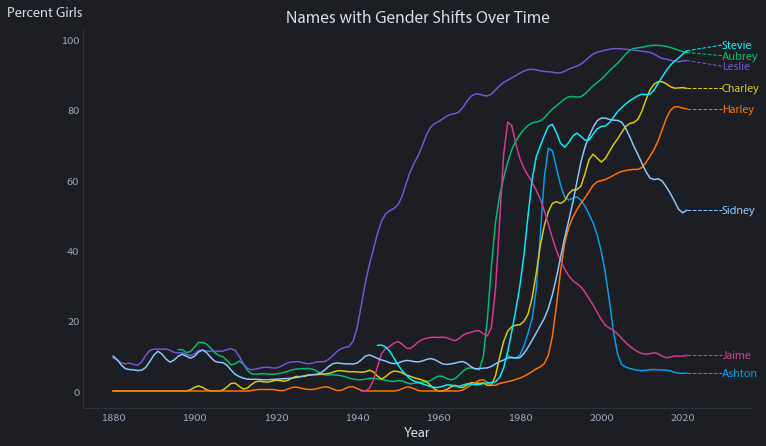

In [7]:
most_change = years.query('count > 50').groupby('name').agg(np.ptp)['pct_female_reg'].abs().sort_values(ascending=False).head(8).index
change_yrs = years.query('name in @most_change and count > 50').pivot_table(index='year', columns='name', values='pct_female')
rolling = change_yrs.rolling(center=True, window=5, min_periods=1, win_type='gaussian').mean(std=1.2).reset_index().melt(id_vars=['year'])

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.lineplot(
    data=rolling,
    x='year',
    y='value',
    hue='name',
    lw=1.5
)

ax.set_ylabel('Percent Girls')
ax.set_xlabel('Year')
ax.set_title('Names with Gender Shifts Over Time')
rp.line_labels(ax)
rp.ylabel_top()

This is one area where language models give us an interesting look at the question "What would English speaker *right now* assume about someone's gender from their name?" RoBERTa assigns an 88% probability to a Stevie being male, which tracks with the most famous Stevie (Wonder) and the near-exact 50/50 split between male and female Stevies in history. 98% of Stevies in 2021 were female, so that's definitely going to change, but for now Stevie is for many a boys name.

We can see similar patterns with other names: the AI lags behind the current data and changes less quickly for names with a long history (like Charlie as a nickname) or famous examples (Stevie). If you're naming a baby right now, the Social Security data is a better marker for how your child will fit in amongst their peers. For naming a fictional character or product, I think the language model is more helpful than demographic data, because it properly incorporates the things that influence how we unconsciously and consciously associate names with particular qualities.

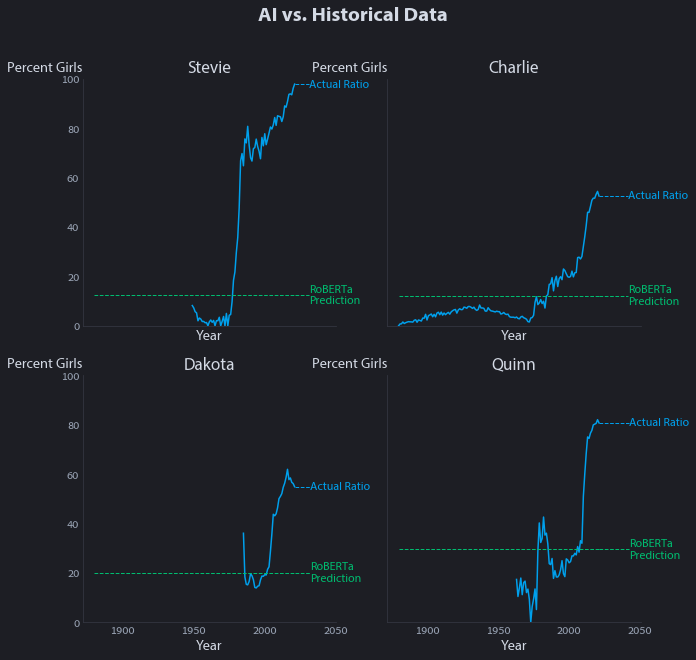

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axs = axs.flatten()

def plot_name(ax, name):    
    ax.plot(
        'year',
        'pct_female',    
        lw=1.5,
        data=years.query('name == @name and count > 100'),
        label='Actual Ratio'
    )

    ax.set_ylim(0, 100)
    ax.plot([1880, 2021], [names.query('Name == @name')['RoBERTa Percent Female'].iloc[0]] * 2, ls='dashed', color=cs[1], label='RoBERTa Prediction', lw=1)

    ax.set_ylabel('Percent Girls')
    ax.set_xlabel('Year')
    ax.set_title(name)
    rp.ylabel_top(ax)
    rp.line_labels(ax)

fig.suptitle('AI vs. Historical Data')
for name, ax in zip(['Stevie', 'Charlie', 'Dakota', 'Quinn'], axs):
    plot_name(ax, name)

## The Most and Least Gendered Names, According to AI

To conclude this exploration of naming and gender, let's look at what the names with the strongest and weakest associations are.

If you want the chatbots of the future to refer to you with female pronouns, here's the names that will ensure that happens.

Famous singers have left quite the mark on this list: note Kesha, Beyonce, Adele, Aretha, Meghan, and Rihanna. We also see a couple common names like Kathleen and a couple names from mythology: Elsa, Diana, and Persephone.

In [9]:
#constellate: dataframe

names.loc[names.sort_values('RoBERTa Percent Female').tail(20).index[::-1]].drop(columns=['Total Babies']).round(2)

,Name,Girls,Boys,Percent Girls,Percent Girls 2021,RoBERTa Percent Female
1686,Jayme,13985,3813,78.58,68.0,99.26
33,Adele,40958,11,99.97,100.0,99.06
309,Aryanna,8991,0,100.00,100.0,99.05
1019,Diana,363224,1285,99.65,100.0,99.05
445,Beyonce,1963,0,100.00,100.0,98.91
1426,Hanna,39648,133,99.67,100.0,98.90
1950,Kathleen,712740,1691,99.76,100.0,98.77
1377,Gracelynn,10076,0,100.00,100.0,98.68
2563,Meghan,95822,226,99.76,100.0,98.67
2028,Kesha,5221,5,99.90,100.0,98.65


If you'd rather be called a him by language models, these are the names for you.

This is a pretty similar list to the female names, with a few more athletes in place of singers.[^1] RoBERTa clearly goes to church: Jesus, Samuel, Abraham, and Abel all make this list.

[^1]: I'm attributing Xander's association to Xander Bogaerts the shortshop and not Xander Harris the Buffy character or any other Xanders.

In [10]:
#constellate: dataframe

names.loc[names.sort_values('RoBERTa Percent Female').head(20).index].drop(columns=['Total Babies']).round(2)

,Name,Girls,Boys,Percent Girls,Percent Girls 2021,RoBERTa Percent Female
495,Brayden,1028,128054,0.80,0.46,0.37
3557,Xander,63,33602,0.19,0.50,0.59
1741,Jesus,2670,235504,1.12,0.27,0.70
1291,Fred,2029,343295,0.59,0.00,0.96
1205,Ernest,1855,301661,0.61,0.00,1.04
3612,Zayn,73,7615,0.95,1.29,1.04
1533,Isiah,11,24154,0.05,0.00,1.18
11,Abel,136,59364,0.23,0.62,1.25
3385,Tim,188,83229,0.23,0.00,1.26
2723,Neymar,5,2613,0.19,0.00,1.27


If you're feeling fluid and want your name to reflect that, here's a list of gender-neutral names[^1].

Many of these names, comparing the historical gender split to 2021, seem to be on the way to becoming more strongly gendered. I would be surprised if Kendall doesn't continue to shift towards girls as all of Kendall Jenner's namesakes grow up. Because of the seeming taboo against boys taking girls names, it's hard to imagine a squad of boy Taylors or Kendalls reversing those trends.

Jackie is an interesting case study, as it's one of the only names that's gone from majority-male around 1940 to majority-female around 1960 to an even split in the present day. Jackie Kennedy, Jackie Robinson, and Jackie Chan are just a few famous bearers of the name, and it seems to be in a relatively stable equilibrium right now.

[^1]: To exclude some of the edge cases we dicussed earlier, like Kim being thought of as gender-neutral due to what I'd guess are mixed signals from its use as a last name, here we limit to names with an actual gender ratio of between 20 and 80% female.

In [11]:
#constellate: dataframe

subs = names.query('abs(`Percent Girls` - 50) < 30 and Name != "Unknown"').drop(columns=['Total Babies'])
subs.loc[subs.eval('abs(50 - `RoBERTa Percent Female`)').sort_values().head(20).index].round(2)

,Name,Girls,Boys,Percent Girls,Percent Girls 2021,RoBERTa Percent Female
3230,Skyler,25744,40372,38.94,58.92,50.33
3177,Shay,7272,4656,60.97,73.15,49.38
2492,Marlo,6813,3298,67.38,56.04,49.36
1765,Jody,55775,31383,63.99,32.35,48.69
601,Camdyn,2568,3433,42.79,36.67,48.63
2364,Lynn,182148,52327,77.68,75.28,51.87
2188,Laverne,42869,13217,76.43,0.00,47.70
3087,Sammie,7713,20758,27.09,70.97,52.44
384,Baby,5974,6203,49.06,53.57,46.99
3335,Taylor,325832,111763,74.46,78.25,46.72
